In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  


In [4]:
df=pd.read_csv("Groceries.csv")
df.head(10)

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
5,4941,2015-02-14,rolls/buns,2015,2,14,5
6,4501,2015-08-05,other vegetables,2015,8,5,2
7,3803,2015-12-23,pot plants,2015,12,23,2
8,2762,2015-03-20,whole milk,2015,3,20,4
9,4119,2015-12-02,tropical fruit,2015,12,2,2


In [9]:
# print(df.shape)
print(df.info)
df.isna().sum()

<bound method DataFrame.info of        Member_number        Date        itemDescription  year  month  day  \
0               1808  2015-07-21         tropical fruit  2015      7   21   
1               2552  2015-05-01             whole milk  2015      5    1   
2               2300  2015-09-19              pip fruit  2015      9   19   
3               1187  2015-12-12       other vegetables  2015     12   12   
4               3037  2015-01-02             whole milk  2015      1    2   
...              ...         ...                    ...   ...    ...  ...   
38760           4471  2014-08-10          sliced cheese  2014      8   10   
38761           2022  2014-02-23                  candy  2014      2   23   
38762           1097  2014-04-16               cake bar  2014      4   16   
38763           1510  2014-03-12  fruit/vegetable juice  2014      3   12   
38764           1521  2014-12-26               cat food  2014     12   26   

       day_of_week  
0                1  
1

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

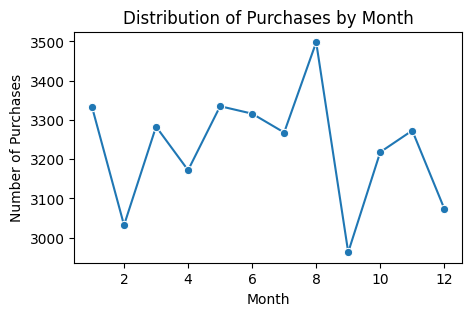

In [10]:
# Aggregate purchases by month
monthly_purchases = df.groupby('month').size()

plt.figure(figsize=(5, 3)) 
sns.lineplot(x=monthly_purchases.index, y=monthly_purchases.values, marker='o', linestyle='-')  # Create the line plot
plt.title('Distribution of Purchases by Month')  
plt.xlabel('Month')  
plt.ylabel('Number of Purchases')  
plt.show() 

<Axes: xlabel='day_of_week'>

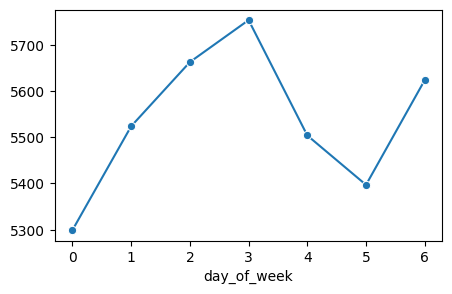

In [13]:
#Aggregate purchases in a week
daily_purchases = df.groupby('day_of_week').size()
plt.figure(figsize=(5, 3)) 
sns.lineplot(x=daily_purchases.index,y=daily_purchases.values, marker='o')

<Axes: ylabel='itemDescription'>

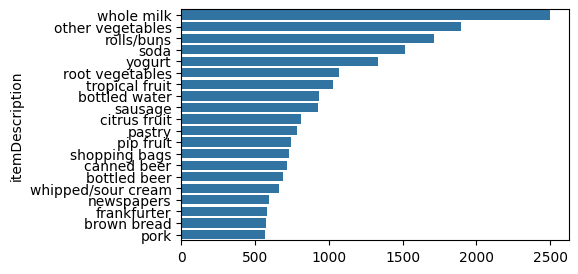

In [14]:
# Plot the most frequently purchased items
plt.figure(figsize=(5, 3))  
top_items = df['itemDescription'].value_counts().head(20)
sns.barplot(y=top_items.index, x=top_items.values)

In [15]:
unique_members = df['Member_number'].nunique()
print(f'Number of unique members: {unique_members}')

Number of unique members: 3898


<Axes: xlabel='count', ylabel='Count'>

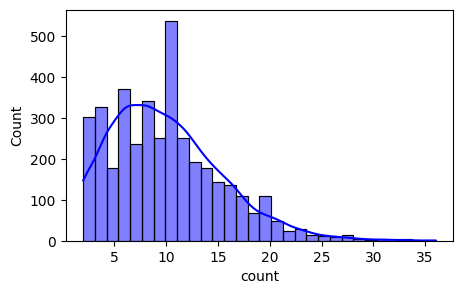

In [17]:
purchases_per_member=df['Member_number'].value_counts()
plt.figure(figsize=(5,3))
sns.histplot(purchases_per_member, bins=30, kde=True, color='blue')


<Axes: xlabel='month', ylabel='purchases'>

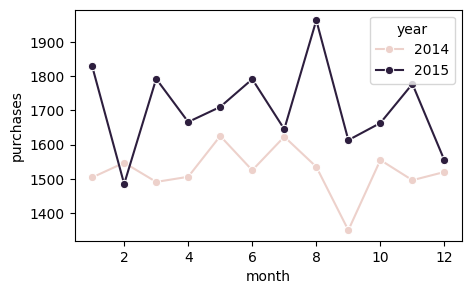

In [20]:
df['Date']=pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
monthly_trends = df.groupby(['year', 'month']).size().reset_index(name='purchases')
plt.figure(figsize=(5, 3))  
sns.lineplot(data=monthly_trends, x='month', y='purchases', hue='year', marker='o')


<Axes: xlabel='day_of_week', ylabel='purchases'>

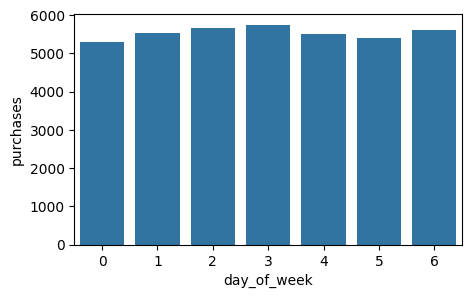

In [22]:
# Group by day of the week and count purchases
daily_trends = df.groupby('day_of_week').size().reset_index(name='purchases')
plt.figure(figsize=(5, 3)) 
sns.barplot(data=daily_trends, x='day_of_week', y='purchases')


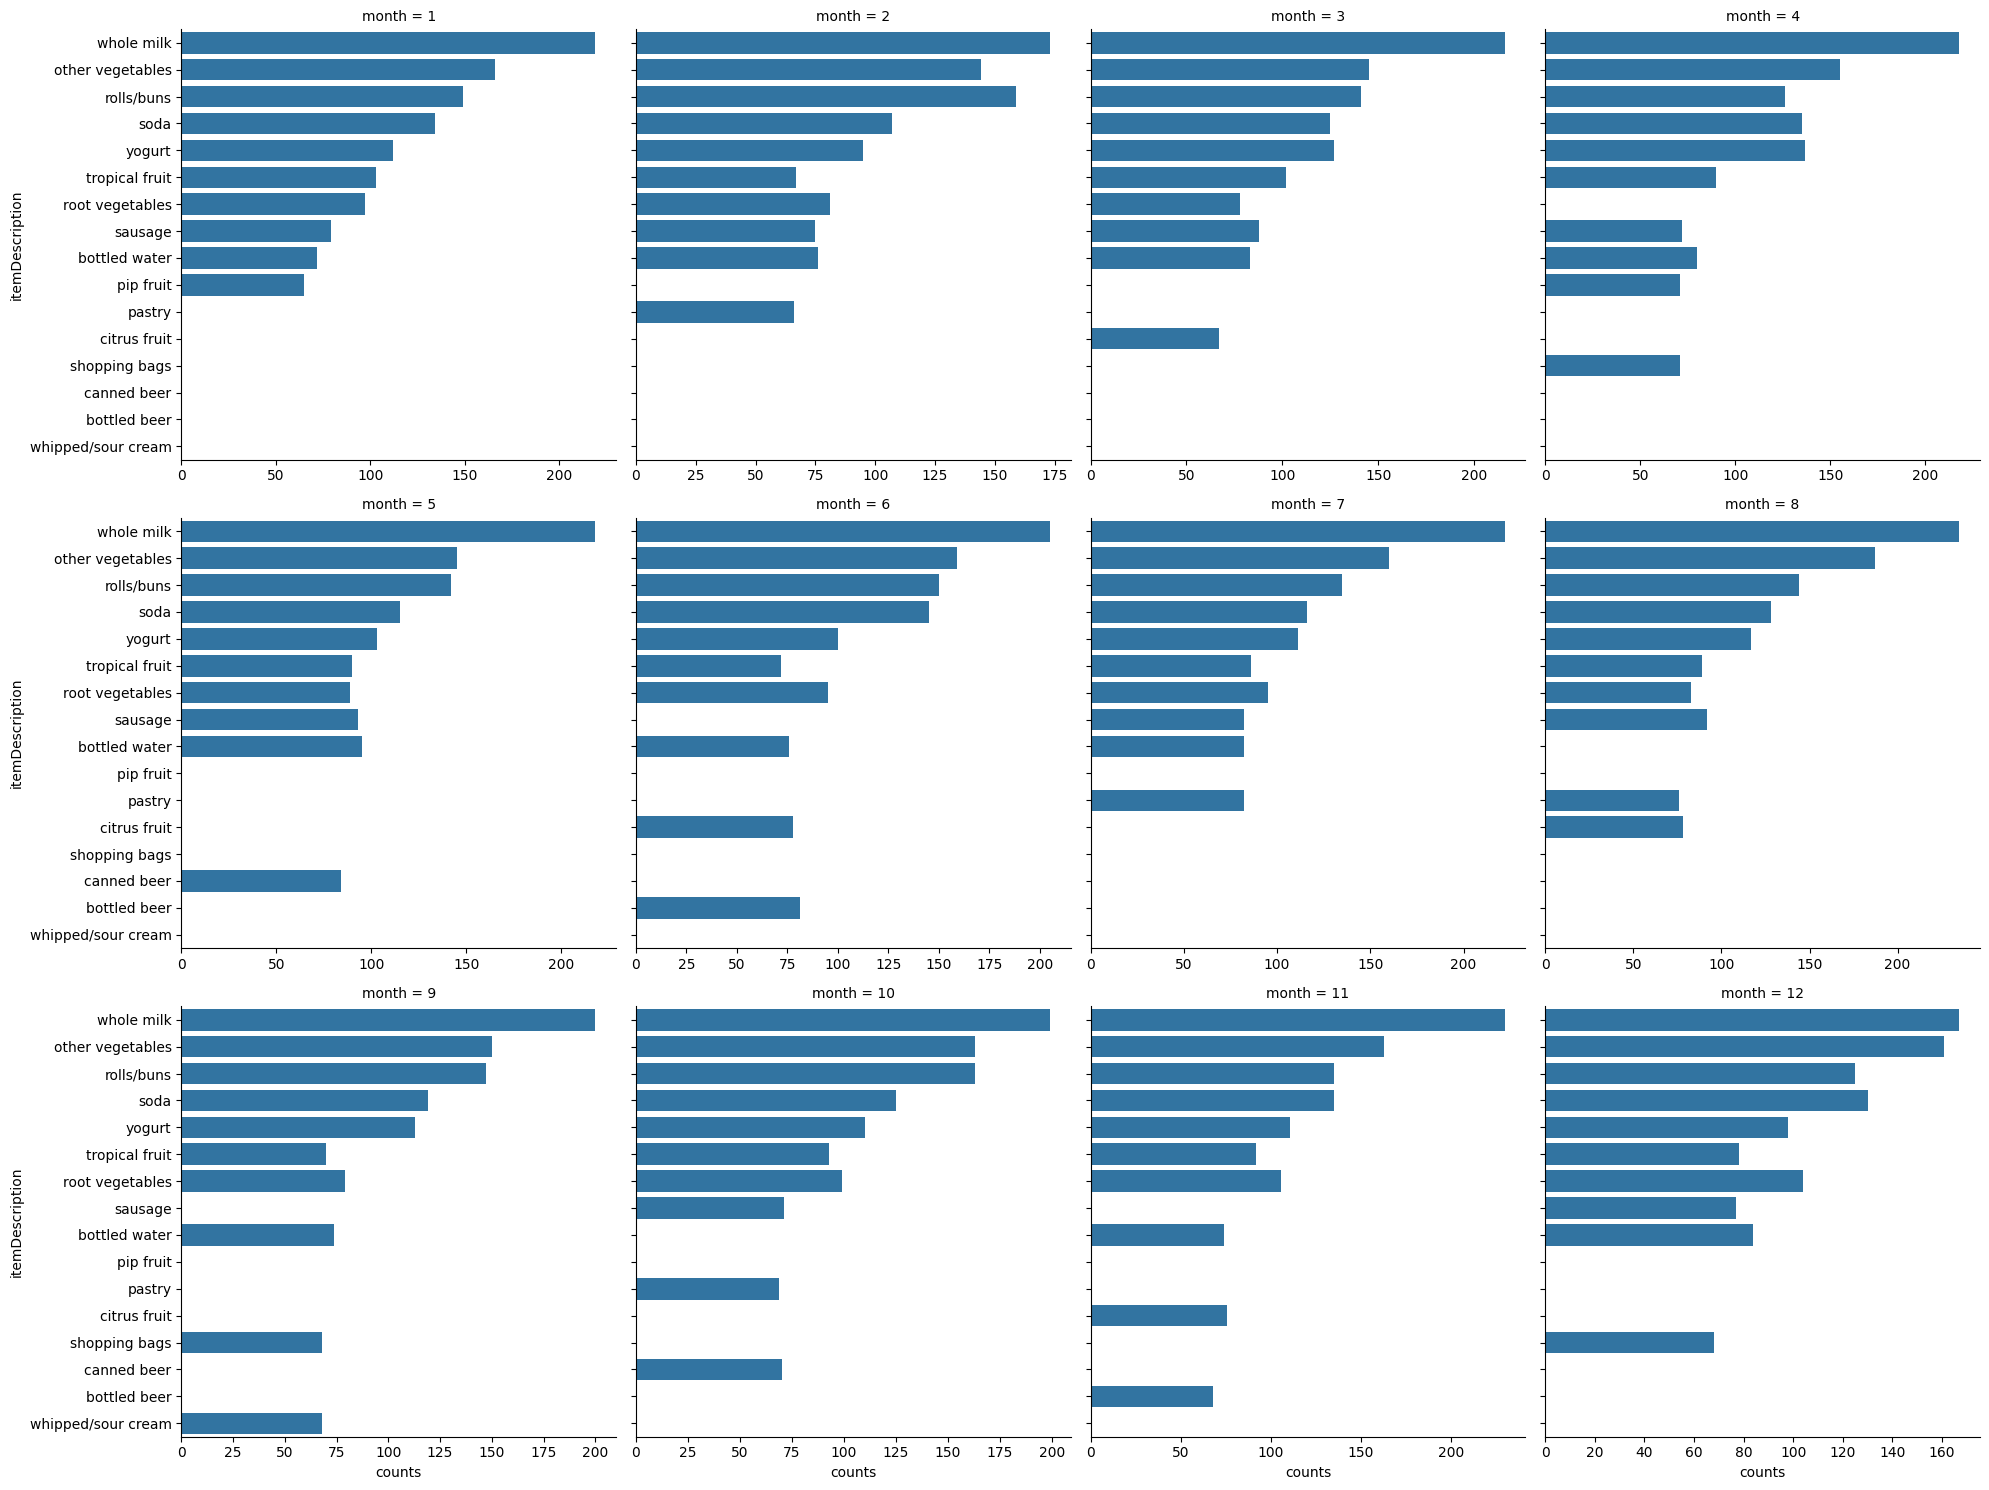

In [26]:
# Get top items for each month
popular_items_monthly = df.groupby(['month', 'itemDescription']).size().reset_index(name='counts')
popular_items_monthly = popular_items_monthly.sort_values(['month', 'counts'], ascending=[True, False]).groupby('month').head(10)
g = sns.FacetGrid(popular_items_monthly, col='month', col_wrap=4, height=5, sharex=False)
g.map(sns.barplot, 'counts', 'itemDescription', order=popular_items_monthly['itemDescription'].unique())

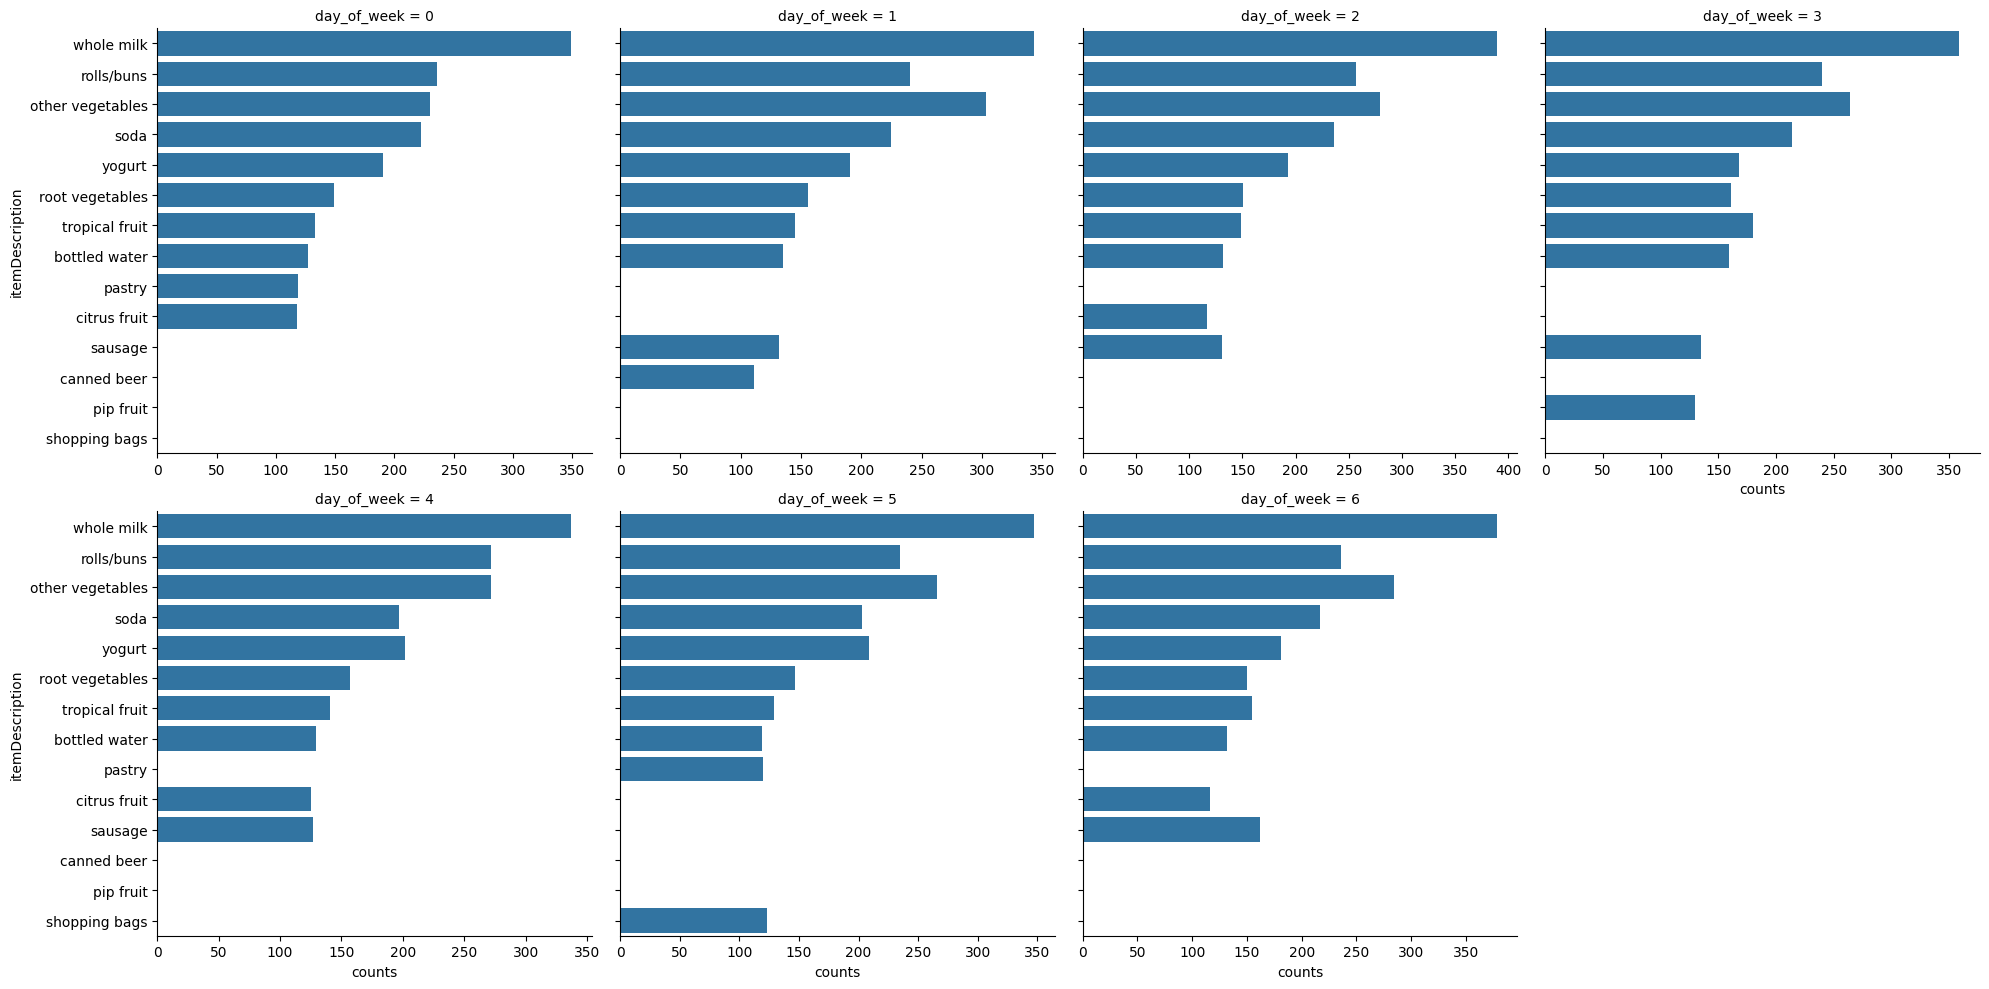

In [27]:
# Get top items for each day of the week
popular_items_daily = df.groupby(['day_of_week', 'itemDescription']).size().reset_index(name='counts')
popular_items_daily = popular_items_daily.sort_values(['day_of_week', 'counts'], ascending=[True, False]).groupby('day_of_week').head(10)

g = sns.FacetGrid(popular_items_daily, col='day_of_week', col_wrap=4, height=5, sharex=False)
g.map(sns.barplot, 'counts', 'itemDescription', order=popular_items_daily['itemDescription'].unique())

<Axes: xlabel='Member_number', ylabel='purchase_count'>

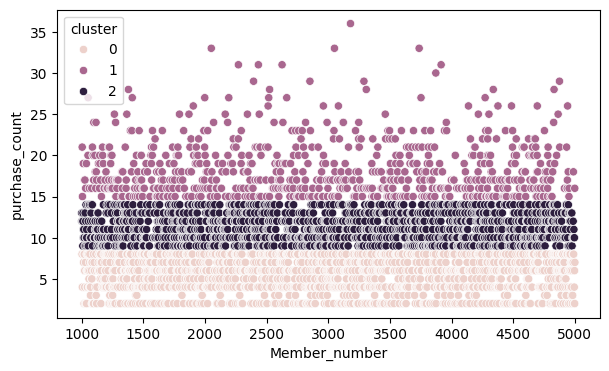

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Aggregate data to get the number of purchases per member
customer_purchases = df.groupby('Member_number').size().reset_index(name='purchase_count')

scaler = StandardScaler()
customer_purchases_scaled = scaler.fit_transform(customer_purchases[['purchase_count']])

kmeans = KMeans(n_clusters=3, random_state=42)
customer_purchases['cluster'] = kmeans.fit_predict(customer_purchases_scaled)

plt.figure(figsize=(7, 4))  
sns.scatterplot(data=customer_purchases, x='Member_number', y='purchase_count', hue='cluster')


In [32]:
customer_purchases

,Member_number,purchase_count,cluster
0,1000,13,2
1,1001,12,2
2,1002,8,0
3,1003,8,0
4,1004,21,1
...,...,...,...
3893,4996,10,2
3894,4997,6,0
3895,4998,2,0
3896,4999,16,1


In [60]:

baskets=df.groupby(['Member_number','itemDescription'])['itemDescription'].count().unstack()
baskets



itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2.0,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
baskets.notnull().sum()


itemDescription
Instant food products      60
UHT-milk                  306
abrasive cleaner           22
artif. sweetener           29
baby cosmetics              3
                         ... 
white bread               346
white wine                172
whole milk               1786
yogurt                   1103
zwieback                   60
Length: 167, dtype: int64

In [62]:
baskets=baskets.fillna(0).reset_index()
baskets.head(10)

itemDescription,Member_number,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
2,1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
5,1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
7,1008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
8,1009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
9,1010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
def convert(value):
    if value<= 0:
        return 0
    else:
        return 1
    
baskets = baskets.iloc[:, 1:baskets.shape[1]].applymap(convert)


C:\Users\SARGAM\AppData\Local\Temp\ipykernel_11964\4101490319.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  baskets = baskets.iloc[:, 1:baskets.shape[1]].applymap(convert)


In [64]:
baskets.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [53]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules

In [65]:
df_new = pd.DataFrame(baskets)
df_bool = df_new.astype(bool)


In [66]:
freq_items = apriori(df_bool, min_support=0.05, use_colnames=True, max_len=3).sort_values(by='support')
freq_items.head(10)

,support,itemsets
80,0.050026,"(whole milk, chicken)"
88,0.050026,"(curd, rolls/buns)"
101,0.050026,"(margarine, other vegetables)"
158,0.050282,"(sausage, whole milk, other vegetables)"
160,0.050539,"(tropical fruit, whole milk, other vegetables)"
57,0.050795,"(beef, other vegetables)"
95,0.051052,"(soda, frankfurter)"
103,0.051565,"(newspapers, other vegetables)"
87,0.051565,"(curd, other vegetables)"
79,0.051821,"(canned beer, yogurt)"


In [67]:
#creating association rules for indicating antecedents and consequent items
rules=association_rules(freq_items, metric="lift", min_threshold=1).sort_values('lift',ascending=False)
rules=rules[['antecedents','consequents','support','confidence','lift']]
rules.head()

,antecedents,consequents,support,confidence,lift
77,(bottled water),"(whole milk, other vegetables)",0.056183,0.262905,1.373732
72,"(whole milk, other vegetables)",(bottled water),0.056183,0.293566,1.373732
75,(other vegetables),"(whole milk, bottled water)",0.056183,0.149183,1.327657
74,"(whole milk, bottled water)",(other vegetables),0.056183,0.500000,1.327657
171,(yogurt),"(whole milk, other vegetables)",0.071832,0.253853,1.326434


In [68]:
import seaborn as sns
#convert antecedents and consequents into strings
rules['antecedents']=rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents']=rules['consequents'].apply(lambda a: ','.join(list(a)))
print(rules[['antecedents','consequents']])

                     antecedents                  consequents
77                 bottled water  whole milk,other vegetables
72   whole milk,other vegetables                bottled water
75              other vegetables     whole milk,bottled water
74      whole milk,bottled water             other vegetables
171                       yogurt  whole milk,other vegetables
..                           ...                          ...
246                         soda             other vegetables
69                        coffee                   whole milk
68                    whole milk                       coffee
219             other vegetables               tropical fruit
218               tropical fruit             other vegetables

[258 rows x 2 columns]
